# NST Experminets Notebook!

This notebook has been tested on google colab.

### Sections:
1. Test Gatys NST implementation with a single pair of content and style images.
2. Test the EvaluationMetrics classs with the generted image.
3. Test the implementation of Gatys NST to perform a collection style trasnger. (NOT WORKING!)

In [10]:
# Run this cell for google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Make sure the directory below matches with yours.
%cd /content/drive/MyDrive/cs7643/project/cs7643-project
%ls

/content/drive/MyDrive/cs7643/project/cs7643-project
 collection_style_transfer.py   fcn.py                        picasso_experiments.xlsx
 CycleGAN.ipynb                 LICENSE                       picasso_nst_experiments.ipynb
 download_cyclegan_dataset.sh   module.py                     __pycache__/
 Eval/                          monet_nst_experiments.ipynb   README.md
 Eval_data.zip                  multi_style_transfer.py       resnet_style_transfer.py
 eval_metrics.py               'old_style_transfer copy.py'   style_transfer.py
 experiments.xslx.gsheet        PerceptualSimilarity/         testing_data/


In [13]:
# Uncomment this line if you need to unzip the eval_data.
#!unzip Eval_data.zip

## Making Sure the Scripts Work Correcly

We are going to test NST implementation for normal style transfer.

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from style_transfer import StyleTransfer
from resnet_style_transfer import StyleTransferResNet

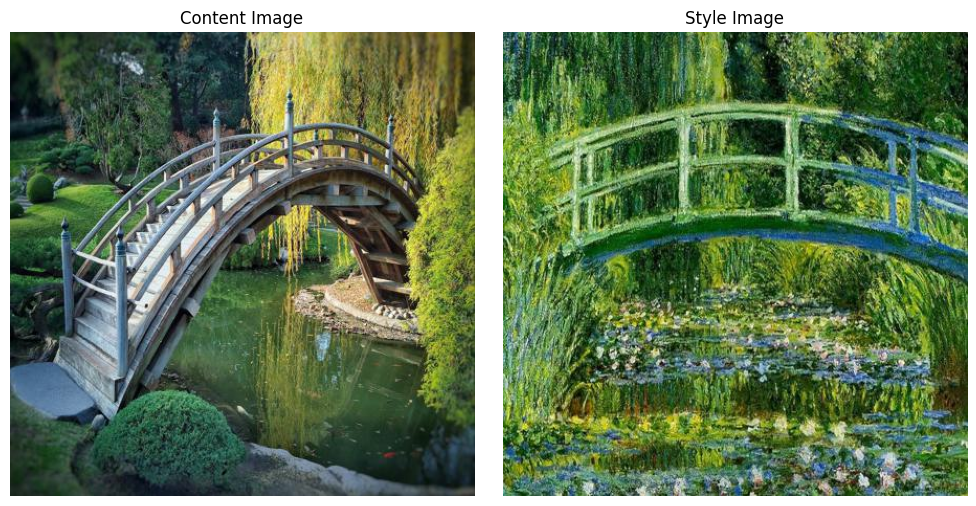

In [6]:
# File paths for the content and style images
content_img_path = "./testing_data/images/resized_real_bridge.jpg"
#content_img_path = "./testing_data/images/tree.png"
style_img_path = "./testing_data/images/resized_monet_bridge.jpg"

# Load the content and style images using matplotlib.image
content_img = mpimg.imread(content_img_path)
style_img = mpimg.imread(style_img_path)

# Create subplots for displaying the images side by side
plt.figure(figsize=(10, 5))

# Plot the content image on the left subplot
plt.subplot(1, 2, 1)
plt.imshow(content_img)
plt.title('Content Image')
plt.axis('off')  # Turn off axis labels

# Plot the style image on the right subplot
plt.subplot(1, 2, 2)
plt.imshow(style_img)
plt.title('Style Image')
plt.axis('off')  # Turn off axis labels

# Show the plots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 74.3MB/s]


Building the style transfer model..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Optimizing..
run [50]:
Style Loss : 5.135174 Content Loss: 6.052555

run [100]:
Style Loss : 1.434133 Content Loss: 4.486726

run [150]:
Style Loss : 0.743700 Content Loss: 3.841626

run [200]:
Style Loss : 0.557997 Content Loss: 3.505488

run [250]:
Style Loss : 0.467005 Content Loss: 3.311750

run [300]:
Style Loss : 0.419570 Content Loss: 3.194449



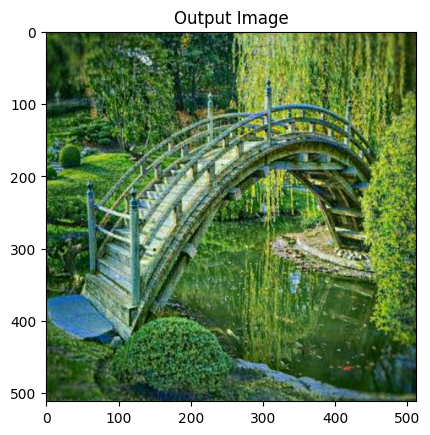

In [ ]:
# Create an instance of the style transfer class with the paths to your images
style_transfer = StyleTransfer(content_img_path, style_img_path)

# Hyper parameters:  num_steps=300, style_weight=1000000, content_weight=1
# Run the style transfer
output = style_transfer.run_style_transfer(style_transfer.content_img, style_transfer.style_img, style_transfer.content_img.clone())

# Display the output
StyleTransfer.imshow(output, title='Output Image')

# Show the plot in the notebook
plt.show()

# Save the resulting image to a file
#style_transfer.save_output_image(output, "./testing_data/images/output_monet.jpg")


# Test Hyperparameter Tunning!

In [15]:
from PIL import Image
from torchvision.utils import save_image
# Function to run style transfer and save the output
def run_style_transfer_and_save(style_weight, content_weight, num_steps, content_layers, style_layers, tv_weight, model_choice, optimizer_choice, loss_choice, output_filename):
    print('model: ', model_choice)
    if model_choice == 'vgg':
      style_transfer = StyleTransfer("./testing_data/images/resized_real_bridge.jpg", "./testing_data/images/resized_monet_bridge.jpg")
    elif model_choice == 'resnet':
      style_transfer = StyleTransferResNet("./testing_data/images/resized_real_bridge.jpg", "./testing_data/images/resized_monet_bridge.jpg")

    output = style_transfer.run_style_transfer(
        style_transfer.content_img,
        style_transfer.style_img,
        style_transfer.content_img.clone(),
        num_steps=num_steps,
        style_weight=style_weight,
        content_weight=content_weight,
        content_layers=content_layers,
        style_layers=style_layers,
        tv_weight = tv_weight,
        optimizer_choice=optimizer_choice,
        loss_choice=loss_choice
    )
    save_image(output, output_filename)

--------------------- Experiment 1
model:  vgg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 5.059871 Content Loss: 6.013831

run [100]:
Style Loss : 1.394047 Content Loss: 4.530486

run [150]:
Style Loss : 0.746347 Content Loss: 3.868980

run [200]:
Style Loss : 0.564205 Content Loss: 3.513085

run [250]:
Style Loss : 0.472400 Content Loss: 3.320558

run [300]:
Style Loss : 0.421212 Content Loss: 3.201222



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 2
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  2000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 9.371000 Content Loss: 6.661715

run [100]:
Style Loss : 2.274878 Content Loss: 5.676164

run [150]:
Style Loss : 1.106999 Content Loss: 4.655387

run [200]:
Style Loss : 0.787581 Content Loss: 4.109022

run [250]:
Style Loss : 0.625113 Content Loss: 3.834286

run [300]:
Style Loss : 0.529092 Content Loss: 3.654463



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 3
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  500000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 2.609024 Content Loss: 5.043599

run [100]:
Style Loss : 0.862013 Content Loss: 3.688609

run [150]:
Style Loss : 0.532963 Content Loss: 3.224107

run [200]:
Style Loss : 0.431524 Content Loss: 3.019770

run [250]:
Style Loss : 0.384689 Content Loss: 2.903999

run [300]:
Style Loss : 0.360968 Content Loss: 2.836392



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 4
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  2
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 5.298460 Content Loss: 10.059891

run [100]:
Style Loss : 1.773517 Content Loss: 7.343550

run [150]:
Style Loss : 1.078380 Content Loss: 6.461990

run [200]:
Style Loss : 0.864965 Content Loss: 6.047396

run [250]:
Style Loss : 0.772431 Content Loss: 5.817738

run [300]:
Style Loss : 0.723360 Content Loss: 5.669374



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 5
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 4.711769 Content Loss: 3.341112

run [100]:
Style Loss : 1.134251 Content Loss: 2.805646

run [150]:
Style Loss : 0.541734 Content Loss: 2.329927

run [200]:
Style Loss : 0.389539 Content Loss: 2.059283

run [250]:
Style Loss : 0.308827 Content Loss: 1.913090

run [300]:
Style Loss : 0.263235 Content Loss: 1.819907



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 6
model:  vgg
Building the style transfer model..
num_steps:  500
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 5.168737 Content Loss: 6.061072

run [100]:
Style Loss : 1.411259 Content Loss: 4.589933

run [150]:
Style Loss : 0.753238 Content Loss: 3.867578

run [200]:
Style Loss : 0.564049 Content Loss: 3.509283

run [250]:
Style Loss : 0.470159 Content Loss: 3.317241

run [300]:
Style Loss : 0.419758 Content Loss: 3.198032

run [350]:
Style Loss : 0.386483 Content Loss: 3.118490

run [400]:
Style Loss : 0.365554 Content Loss: 3.068570

run [450]:
Style Loss : 0.351653 Content Loss: 3.033233

run [500]:
Style Loss : 0.341296 Content Loss: 3.003649



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 7
model:  vgg
Building the style transfer model..
num_steps:  1000
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 4.901616 Content Loss: 6.035328

run [100]:
Style Loss : 1.350321 Content Loss: 4.536727

run [150]:
Style Loss : 0.735261 Content Loss: 3.846196

run [200]:
Style Loss : 0.555799 Content Loss: 3.497977

run [250]:
Style Loss : 0.472936 Content Loss: 3.312514

run [300]:
Style Loss : 0.421912 Content Loss: 3.194961

run [350]:
Style Loss : 0.389136 Content Loss: 3.123789

run [400]:
Style Loss : 0.365502 Content Loss: 3.069858

run [450]:
Style Loss : 0.352680 Content Loss: 3.029869

run [500]:
Style Loss : 0.340127 Content Loss: 3.003110

run [550]:
Style Loss : 0.333190 Content Loss: 2.984096

run [600]:
Style Loss : 0.343029 Content Loss: 2.967770

run [650]:
Style Loss : 0.328018 Content Loss: 2.961835

run [700]:
Style Loss : 0.326067 Content Loss: 2.943231

run [750]:
Style Loss : 0.319311 Content Loss: 2.941819

run [800]:
Style Loss : 0.314348 Content Loss: 2.926846

run [850]:
Style Loss : 0.315865 Content Loss: 2.933059

run [900]:
Style Loss : 0.310392

/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)


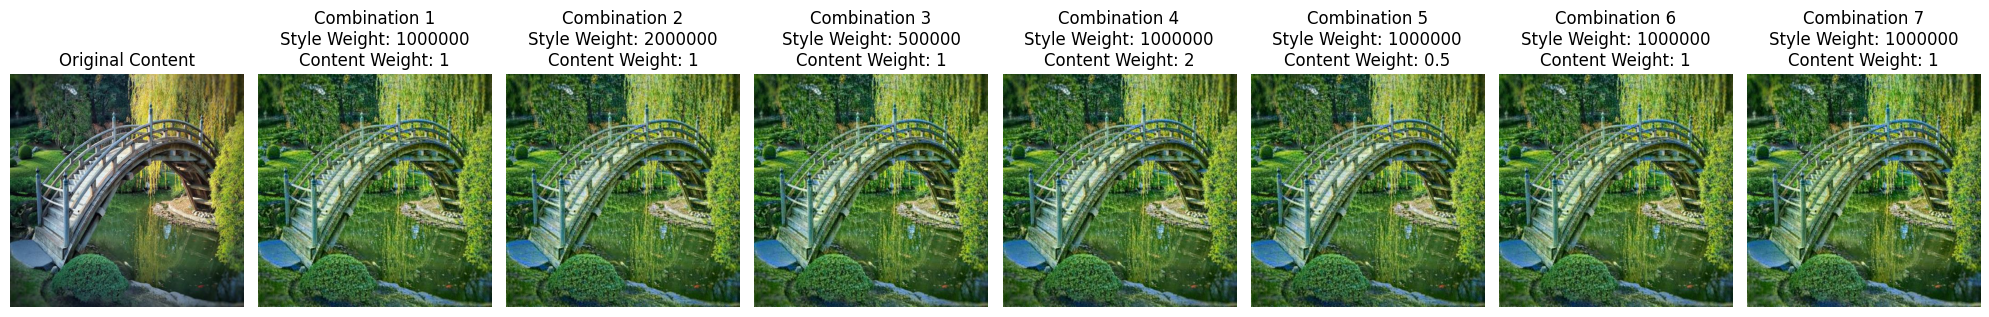

In [20]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 500, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 1000, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/resized_real_bridge.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1}')
    output_filename = f"./testing_data/output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Test different content layers!

--------------------- Experiment 1 ----------------------
model:  vgg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 4.770206 Content Loss: 3.338909

run [100]:
Style Loss : 1.106115 Content Loss: 2.819843

run [150]:
Style Loss : 0.550040 Content Loss: 2.335786

run [200]:
Style Loss : 0.394583 Content Loss: 2.064678

run [250]:
Style Loss : 0.311560 Content Loss: 1.923855

run [300]:
Style Loss : 0.265285 Content Loss: 1.826702



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_1']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 0.086252 Content Loss: 0.046006

run [100]:
Style Loss : 0.020583 Content Loss: 0.049653

run [150]:
Style Loss : 0.009150 Content Loss: 0.048919

run [200]:
Style Loss : 0.005632 Content Loss: 0.047203

run [250]:
Style Loss : 0.004157 Content Loss: 0.045737

run [300]:
Style Loss : 0.003376 Content Loss: 0.044617



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 3 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_2']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 0.089679 Content Loss: 0.306910

run [100]:
Style Loss : 0.034644 Content Loss: 0.278696

run [150]:
Style Loss : 0.023707 Content Loss: 0.264287

run [200]:
Style Loss : 0.019577 Content Loss: 0.257261

run [250]:
Style Loss : 0.017474 Content Loss: 0.253256

run [300]:
Style Loss : 0.016346 Content Loss: 0.250806



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 4 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_3']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 0.107104 Content Loss: 0.357423

run [100]:
Style Loss : 0.050621 Content Loss: 0.295892

run [150]:
Style Loss : 0.038388 Content Loss: 0.274916

run [200]:
Style Loss : 0.033797 Content Loss: 0.265568

run [250]:
Style Loss : 0.031427 Content Loss: 0.260208

run [300]:
Style Loss : 0.030644 Content Loss: 0.257125



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 5 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_4']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 0.151191 Content Loss: 0.541080

run [100]:
Style Loss : 0.084068 Content Loss: 0.447140

run [150]:
Style Loss : 0.070027 Content Loss: 0.419810

run [200]:
Style Loss : 0.064732 Content Loss: 0.408017

run [250]:
Style Loss : 0.062432 Content Loss: 0.401142

run [300]:
Style Loss : 0.061600 Content Loss: 0.398230



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 6 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['relu_5']
Style Layers: ['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 0.210868 Content Loss: 0.745725

run [100]:
Style Loss : 0.139213 Content Loss: 0.631974

run [150]:
Style Loss : 0.123055 Content Loss: 0.599189

run [200]:
Style Loss : 0.116499 Content Loss: 0.585073

run [250]:
Style Loss : 0.113502 Content Loss: 0.577148

run [300]:
Style Loss : 0.112084 Content Loss: 0.572369



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)


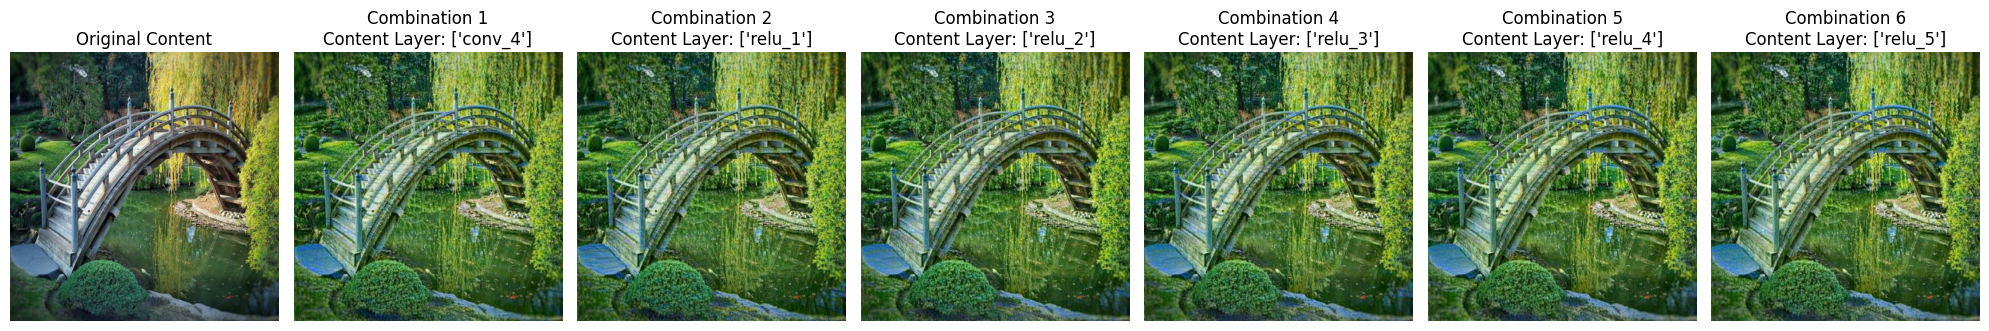

In [21]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_1'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_2'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_3'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_4'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['relu_5'], "style_layers":['relu_1', 'relu_2', 'relu_3', 'relu_4', 'relu_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'}
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 6))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/resized_real_bridge.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/diff_content_layer_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}\nContent Layer: {params['content_layers']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()

# Test different Total Variation Regularization

--------------------- Experiment 1 ----------------------
model:  vgg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.1
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 625.333740 Content Loss: 8.577830

run [100]:
Style Loss : 648.822815 Content Loss: 11.050138

run [150]:
Style Loss : 663.940002 Content Loss: 13.026756

run [200]:
Style Loss : 674.381836 Content Loss: 14.847725

run [250]:
Style Loss : 679.406799 Content Loss: 16.759748

run [300]:
Style Loss : 683.334595 Content Loss: 19.131512



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  2000000
content_weight:  1
TV Weight:  0.1
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 547.083130 Content Loss: 7.888827

run [100]:
Style Loss : 567.351013 Content Loss: 10.236857

run [150]:
Style Loss : 577.349548 Content Loss: 11.906380

run [200]:
Style Loss : 586.382629 Content Loss: 13.415911

run [250]:
Style Loss : 597.511597 Content Loss: 15.232811

run [300]:
Style Loss : 608.046326 Content Loss: 17.455288



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 3 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  500000
content_weight:  1
TV Weight:  0.1
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 653.357056 Content Loss: 9.785148

run [100]:
Style Loss : 701.954956 Content Loss: 12.155233

run [150]:
Style Loss : 710.557068 Content Loss: 13.966058

run [200]:
Style Loss : 711.953796 Content Loss: 15.831863

run [250]:
Style Loss : 716.987488 Content Loss: 17.767437

run [300]:
Style Loss : 719.570862 Content Loss: 20.362659



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 4 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  2
TV Weight:  0.1
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 627.176575 Content Loss: 16.892744

run [100]:
Style Loss : 648.854248 Content Loss: 21.763073

run [150]:
Style Loss : 662.962646 Content Loss: 25.564922

run [200]:
Style Loss : 673.616455 Content Loss: 29.058407

run [250]:
Style Loss : 690.643616 Content Loss: 32.880890

run [300]:
Style Loss : 683.325073 Content Loss: 37.677528



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 5 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.1
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 627.745972 Content Loss: 4.302608

run [100]:
Style Loss : 648.555298 Content Loss: 5.544887

run [150]:
Style Loss : 663.762146 Content Loss: 6.568576

run [200]:
Style Loss : 673.537109 Content Loss: 7.481107

run [250]:
Style Loss : 680.413940 Content Loss: 8.482281

run [300]:
Style Loss : 681.128540 Content Loss: 9.715097



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 6 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  1.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 8997.458984 Content Loss: 9.906356

run [100]:
Style Loss : 8939.557617 Content Loss: 12.994743

run [150]:
Style Loss : 8738.379883 Content Loss: 15.125320

run [200]:
Style Loss : 8500.192383 Content Loss: 16.774303

run [250]:
Style Loss : 8223.875977 Content Loss: 18.249790

run [300]:
Style Loss : 7914.269531 Content Loss: 19.732292



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 7 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.01
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 37.067440 Content Loss: 6.802909

run [100]:
Style Loss : 37.150066 Content Loss: 8.212015

run [150]:
Style Loss : 37.934940 Content Loss: 9.168830

run [200]:
Style Loss : 38.841778 Content Loss: 9.895211

run [250]:
Style Loss : 39.695343 Content Loss: 10.517380

run [300]:
Style Loss : 40.680099 Content Loss: 11.157716



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)


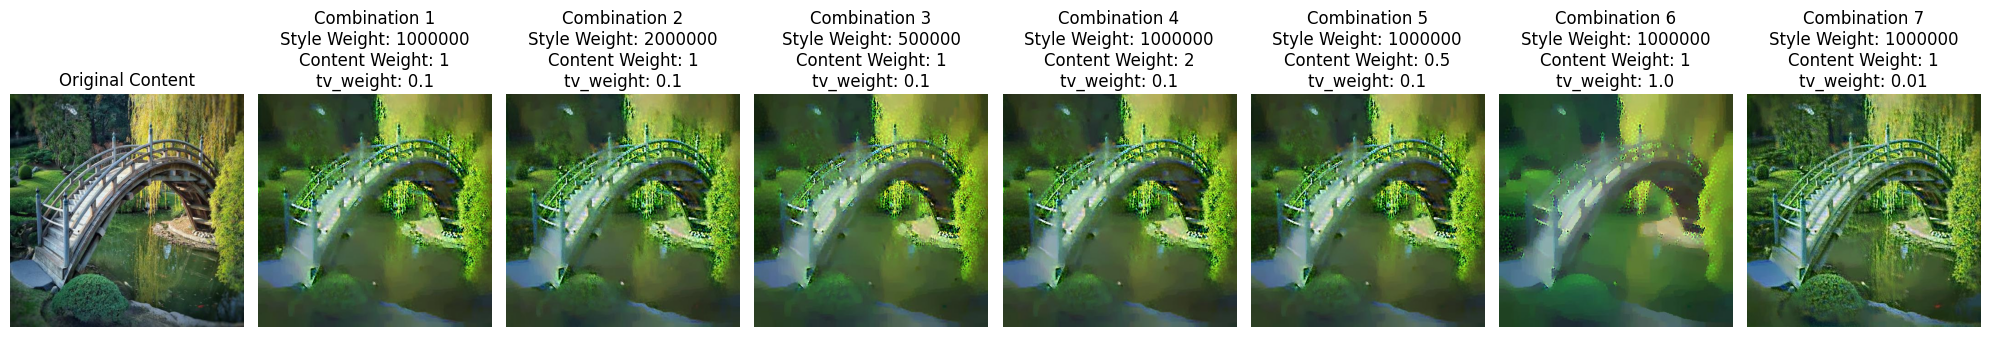

In [22]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.1, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 1.0, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight': 0.01, 'model_choice': 'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/resized_real_bridge.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/diff_tv_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}\ntv_weight: {params['tv_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Test Adam Optimizer

--------------------- Experiment 1 ----------------------
model:  vgg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 18.248137 Content Loss: 7.908444

run [100]:
Style Loss : 5.966067 Content Loss: 7.299941

run [150]:
Style Loss : 3.742424 Content Loss: 6.649106

run [200]:
Style Loss : 2.690759 Content Loss: 6.082784

run [250]:
Style Loss : 2.105392 Content Loss: 5.609840

run [300]:
Style Loss : 1.742203 Content Loss: 5.225500

--------------------- Experiment 2 ----------------------
model:  vgg


/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  2000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 36.539906 Content Loss: 8.112030

run [100]:
Style Loss : 11.757980 Content Loss: 7.891199

run [150]:
Style Loss : 7.179645 Content Loss: 7.554596

run [200]:
Style Loss : 5.011353 Content Loss: 7.198987

run [250]:
Style Loss : 3.813630 Content Loss: 6.843225

run [300]:
Style Loss : 3.083631 Content Loss: 6.501609

--------------------- Experiment 3 ----------------------
model:  vgg


/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  500000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 9.131906 Content Loss: 7.520542

run [100]:
Style Loss : 3.123659 Content Loss: 6.318995

run [150]:
Style Loss : 2.059296 Content Loss: 5.408737

run [200]:
Style Loss : 1.540910 Content Loss: 4.798647

run [250]:
Style Loss : 1.244352 Content Loss: 4.380928

run [300]:
Style Loss : 1.058557 Content Loss: 4.086085

--------------------- Experiment 4 ----------------------
model:  vgg


/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  2
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 18.263472 Content Loss: 15.043342

run [100]:
Style Loss : 6.247066 Content Loss: 12.639427

run [150]:
Style Loss : 4.118064 Content Loss: 10.818134

run [200]:
Style Loss : 3.081825 Content Loss: 9.596838

run [250]:
Style Loss : 2.488388 Content Loss: 8.761594

run [300]:
Style Loss : 2.116537 Content Loss: 8.172718

--------------------- Experiment 5 ----------------------
model:  vgg


/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 18.269859 Content Loss: 4.055943

run [100]:
Style Loss : 5.878520 Content Loss: 3.945377

run [150]:
Style Loss : 3.590672 Content Loss: 3.777307

run [200]:
Style Loss : 2.506335 Content Loss: 3.599588

run [250]:
Style Loss : 1.907063 Content Loss: 3.421710

run [300]:
Style Loss : 1.541868 Content Loss: 3.250984

--------------------- Experiment 6 ----------------------
model:  vgg


/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  500
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 18.250629 Content Loss: 7.908619

run [100]:
Style Loss : 5.965559 Content Loss: 7.299722

run [150]:
Style Loss : 3.742689 Content Loss: 6.648774

run [200]:
Style Loss : 2.690861 Content Loss: 6.082525

run [250]:
Style Loss : 2.105275 Content Loss: 5.610281

run [300]:
Style Loss : 1.742049 Content Loss: 5.226154

run [350]:
Style Loss : 1.496336 Content Loss: 4.916475

run [400]:
Style Loss : 1.318107 Content Loss: 4.668124

run [450]:
Style Loss : 1.182687 Content Loss: 4.466424

run [500]:
Style Loss : 1.120429 Content Loss: 4.303414

--------------------- Experiment 7 ----------------------
model:  vgg


/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  1000
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  adam
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 18.249174 Content Loss: 7.908412

run [100]:
Style Loss : 5.965335 Content Loss: 7.299827

run [150]:
Style Loss : 3.742280 Content Loss: 6.648851

run [200]:
Style Loss : 2.690529 Content Loss: 6.082636

run [250]:
Style Loss : 2.105155 Content Loss: 5.609844

run [300]:
Style Loss : 1.741940 Content Loss: 5.225720

run [350]:
Style Loss : 1.496077 Content Loss: 4.915944

run [400]:
Style Loss : 1.317600 Content Loss: 4.668097

run [450]:
Style Loss : 1.181973 Content Loss: 4.466732

run [500]:
Style Loss : 1.219244 Content Loss: 4.310452

run [550]:
Style Loss : 1.024340 Content Loss: 4.173204

run [600]:
Style Loss : 0.922526 Content Loss: 4.059849

run [650]:
Style Loss : 1.130550 Content Loss: 3.985950

run [700]:
Style Loss : 2.107533 Content Loss: 3.879148

run [750]:
Style Loss : 0.769721 Content Loss: 3.819678

run [800]:
Style Loss : 0.799607 Content Loss: 3.805513

run [850]:
Style Loss : 0.821739 Content Loss: 3.831351

run [900]:
Style Loss : 0.84453

/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)


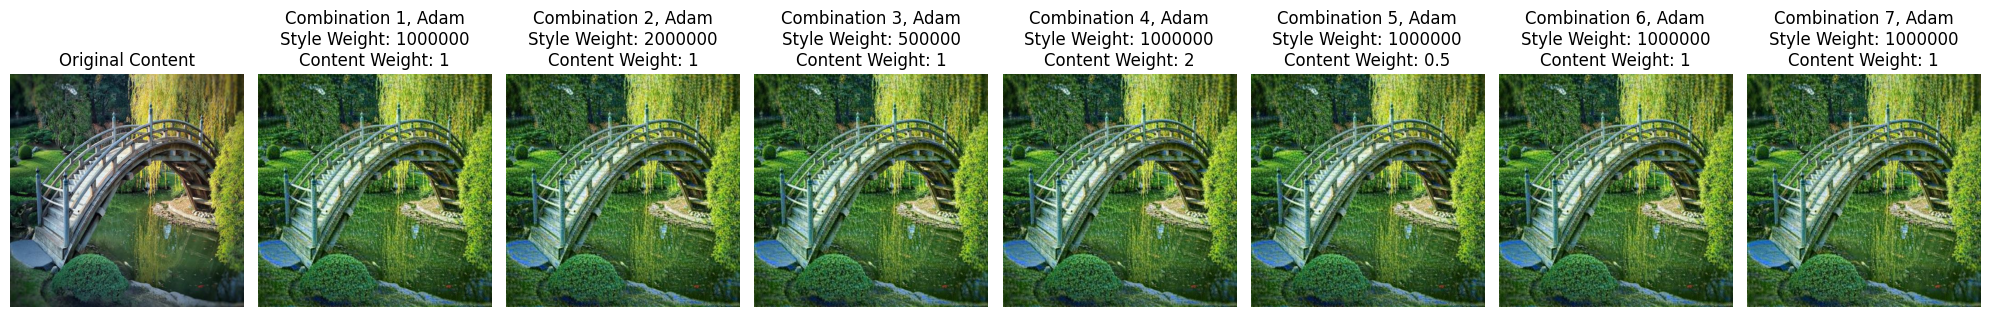

In [23]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 500, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 1000, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'adam','loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/resized_real_bridge.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/adam_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, Adam\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Test Perceptual Loss

--------------------- Experiment 1 ----------------------
model:  vgg


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 1443.742432 Content Loss: 30.917337

run [100]:
Style Loss : 592.848145 Content Loss: 32.573330

run [150]:
Style Loss : 462.693451 Content Loss: 33.158409

run [200]:
Style Loss : 418.002258 Content Loss: 33.427284

run [250]:
Style Loss : 398.470001 Content Loss: 33.583271

run [300]:
Style Loss : 389.030182 Content Loss: 33.673470



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 2 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  2000000
content_weight:  1
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 2871.371582 Content Loss: 30.909023

run [100]:
Style Loss : 1166.984253 Content Loss: 32.562553

run [150]:
Style Loss : 918.456848 Content Loss: 33.154186

run [200]:
Style Loss : 839.739075 Content Loss: 33.420429

run [250]:
Style Loss : 798.487671 Content Loss: 33.568024

run [300]:
Style Loss : 781.254456 Content Loss: 33.661995



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 3 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  500000
content_weight:  1
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 716.730408 Content Loss: 30.893114

run [100]:
Style Loss : 295.315857 Content Loss: 32.533970

run [150]:
Style Loss : 230.775223 Content Loss: 33.138195

run [200]:
Style Loss : 209.739456 Content Loss: 33.397198

run [250]:
Style Loss : 199.953705 Content Loss: 33.549118

run [300]:
Style Loss : 194.848053 Content Loss: 33.658070



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 4 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  2
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 1422.932007 Content Loss: 61.762100

run [100]:
Style Loss : 581.016602 Content Loss: 65.090614

run [150]:
Style Loss : 455.883453 Content Loss: 66.308449

run [200]:
Style Loss : 416.298920 Content Loss: 66.864670

run [250]:
Style Loss : 398.003876 Content Loss: 67.140327

run [300]:
Style Loss : 388.736725 Content Loss: 67.340080



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 5 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  0.5
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 1438.076904 Content Loss: 15.452920

run [100]:
Style Loss : 585.690186 Content Loss: 16.273270

run [150]:
Style Loss : 460.817200 Content Loss: 16.573952

run [200]:
Style Loss : 415.230835 Content Loss: 16.705935

run [250]:
Style Loss : 392.992737 Content Loss: 16.783024

run [300]:
Style Loss : 382.049133 Content Loss: 16.834204



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 6 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  500
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 1439.071899 Content Loss: 30.896549

run [100]:
Style Loss : 588.262024 Content Loss: 32.559780

run [150]:
Style Loss : 458.595856 Content Loss: 33.162926

run [200]:
Style Loss : 416.887878 Content Loss: 33.446636

run [250]:
Style Loss : 395.075806 Content Loss: 33.592445

run [300]:
Style Loss : 385.643036 Content Loss: 33.693329

run [350]:
Style Loss : 381.358856 Content Loss: 33.761257

run [400]:
Style Loss : 381.444214 Content Loss: 33.813034

run [450]:
Style Loss : 385.089203 Content Loss: 33.861214

run [500]:
Style Loss : 390.150299 Content Loss: 33.907627



/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


--------------------- Experiment 7 ----------------------
model:  vgg
Building the style transfer model..
num_steps:  1000
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  perceptual
Content_layers:  ['conv_4']
Style Layers: ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
Optimizer:  lbfgs
Optimizing..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


run [50]:
Style Loss : 1442.564941 Content Loss: 30.902485

run [100]:
Style Loss : 584.913025 Content Loss: 32.565147

run [150]:
Style Loss : 460.896271 Content Loss: 33.153183

run [200]:
Style Loss : 417.794312 Content Loss: 33.408455

run [250]:
Style Loss : 399.014862 Content Loss: 33.563427

run [300]:
Style Loss : 390.038269 Content Loss: 33.668705

run [350]:
Style Loss : 383.511047 Content Loss: 33.747105

run [400]:
Style Loss : 379.444824 Content Loss: 33.804985

run [450]:
Style Loss : 380.258667 Content Loss: 33.851536

run [500]:
Style Loss : 382.003418 Content Loss: 33.882488

run [550]:
Style Loss : 387.168671 Content Loss: 33.919334

run [600]:
Style Loss : 399.334625 Content Loss: 33.955147

run [650]:
Style Loss : 410.824677 Content Loss: 33.984699

run [700]:
Style Loss : 427.925537 Content Loss: 34.026215

run [750]:
Style Loss : 439.436096 Content Loss: 34.019505

run [800]:
Style Loss : 450.701019 Content Loss: 34.050564

run [850]:
Style Loss : 491.409790 Conte

/content/drive/MyDrive/cs7643/project/cs7643-project/style_transfer.py:128: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append, ignore_index=True)


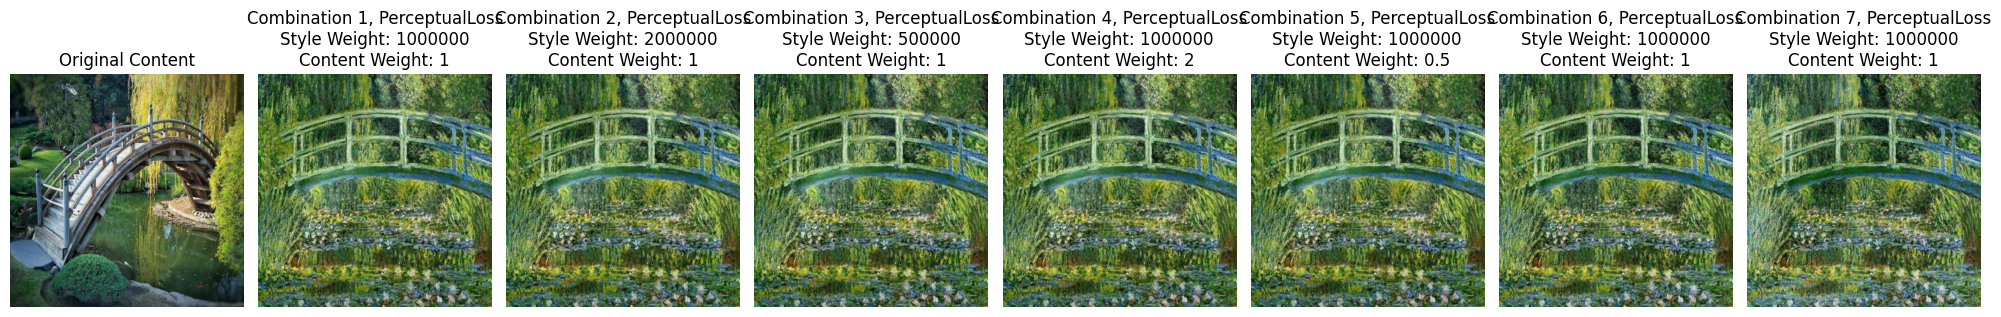

In [24]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 500, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs', 'loss_choice':'perceptual'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 1000, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'vgg', 'optimizer_choice':'lbfgs','loss_choice':'perceptual'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/resized_real_bridge.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/perceptual_loss_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, PerceptualLoss\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


# Test Resnet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


--------------------- Experiment 1 ----------------------
model:  resnet


100%|██████████| 97.8M/97.8M [00:00<00:00, 136MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Building the style transfer model..
num_steps:  300
style_weight:  1000000
content_weight:  1
TV Weight:  0.0
loss_choice:  generic
Optimizer:  lbfgs
Optimizing..


AttributeError: ignored

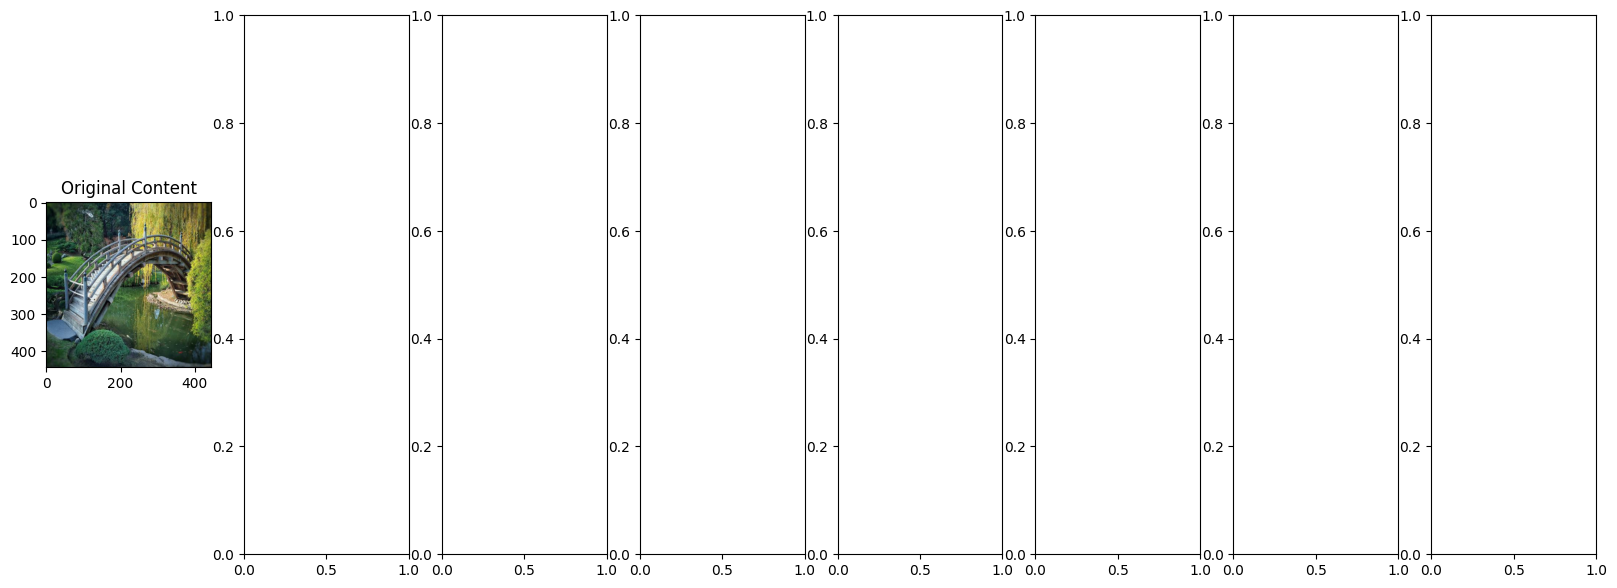

In [25]:
# Define hyperparameter combinations
hyperparameter_combinations = [
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 2000000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 500000, "content_weight": 1, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 2, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 0.5, "num_steps": 300, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 500, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs', 'loss_choice':'generic'},
    {"style_weight": 1000000, "content_weight": 1, "num_steps": 1000, "content_layers":['conv_4'], "style_layers":['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'], 'tv_weight':0.0, 'model_choice':'resnet', 'optimizer_choice':'lbfgs','loss_choice':'generic'},
]

# Create subplots for displaying images
fig, axs = plt.subplots(1, len(hyperparameter_combinations) + 1, figsize=(20, 7))

# Display original content image
axs[0].imshow(Image.open("./testing_data/images/resized_real_bridge.jpg"))
axs[0].set_title("Original Content")

# Run style transfer for each hyperparameter combination and display the results
for i, params in enumerate(hyperparameter_combinations):
    print(f'--------------------- Experiment {i + 1} ----------------------')
    output_filename = f"./testing_data/resnet_output_{i + 1}.jpg"
    run_style_transfer_and_save(**params, output_filename=output_filename)
    axs[i + 1].imshow(Image.open(output_filename))
    axs[i + 1].set_title(f"Combination {i + 1}, RESNET\nStyle Weight: {params['style_weight']}\nContent Weight: {params['content_weight']}")

# Remove axis labels and display the figure
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()


## Testing Evaluation Metrics

Here we will make sure that the implementation of all evaluation metrics is working

In [ ]:
# Dependencies
!pip install pytorch-fid
!pip install lpips

In [ ]:
# Import libraries and modules
from eval_metrics import EvaluationMetrics

In [ ]:
eval_metrics = EvaluationMetrics(device='cuda')

# Input the correct file paths
generated_image_path = './testing_data/images/output_monet.jpg'   # This is the output of the model. AKA the generated image.

# Compute SSIM
ssim_score = eval_metrics.compute_ssim(content_image_path, generated_image_path)
print(f'SSIM: {ssim_score}')

# Compute PSNR
psnr_score = eval_metrics.compute_psnr(content_image_path, generated_image_path)
print(f'PSNR: {psnr_score}')

# Preprocess the images for feature-based similarity and LPIPS
content_tensor = eval_metrics.preprocess_image(content_image_path)
generated_tensor = eval_metrics.preprocess_image(generated_image_path)

# Compute feature-based similarity
feature_similarity = eval_metrics.compute_feature_similarity(content_tensor, generated_tensor)
print(f'Feature-based similarity (cosine): {feature_similarity}')

# Compute LPIPS and ArtFID
lpips_score, art_fid_score = eval_metrics.compute_lpips_and_artFID(content_tensor, generated_tensor)
print(f'LPIPS: {lpips_score}')
print(f'ArtFID:{art_fid_score}')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
SSIM: 0.24671035148355297
PSNR: 7.724095071644114
Feature-based similarity (cosine): 0.2443183958530426
LPIPS: 0.7578891515731812
ArtFID:9.635071952760368


In [ ]:
# Note: this is compute over all the style collection and output collection
# Compute FID
#!python -m pytorch_fid "./testing_data/images/picasso.jpg" './testing_data/images/output.jpg' --dims 192

Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/pytorch_fid/__main__.py", line 3, in <module>
    pytorch_fid.fid_score.main()
  File "/usr/local/lib/python3.10/dist-packages/pytorch_fid/fid_score.py", line 313, in main
    fid_value = calculate_fid_given_paths(args.path,
  File "/usr/local/lib/python3.10/dist-packages/pytorch_fid/fid_score.py", line 259, in calculate_fid_given_paths
    m1, s1 = compute_statistics_of_path(paths[0], model, batch_size,
  File "/usr/local/lib/python3.10/dist-packages/pytorch_fid/fid_score.py", line 243, in compute_statistics_of_path
    m, s = calculate_activation_statistics(files, model, batch_size,
  File "/usr/local/lib/python3.10/dist-packages/pytorch_fid/fid_score.py", line 228, in calculate_activation_statisti